In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('advertising.csv')
df.shape,df.head()

((1000, 10),
    Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
 0                     68.95   35     61833.90                256.09   
 1                     80.23   31     68441.85                193.77   
 2                     69.47   26     59785.94                236.50   
 3                     74.15   29     54806.18                245.89   
 4                     68.37   35     73889.99                225.58   
 
                            Ad Topic Line            City  Male     Country  \
 0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
 1     Monitored national standardization       West Jodi     1       Nauru   
 2       Organic bottom-line service-desk        Davidton     0  San Marino   
 3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
 4          Robust logistical utilization    South Manuel     0     Iceland   
 
           Timestamp  Clicked on Ad  
 0  27-03-2016 00:53              0  
 

In [7]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Daily Internet Usage'].mean()

np.float64(180.0001)

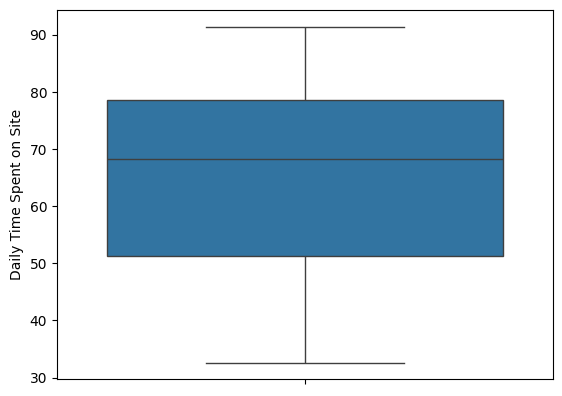

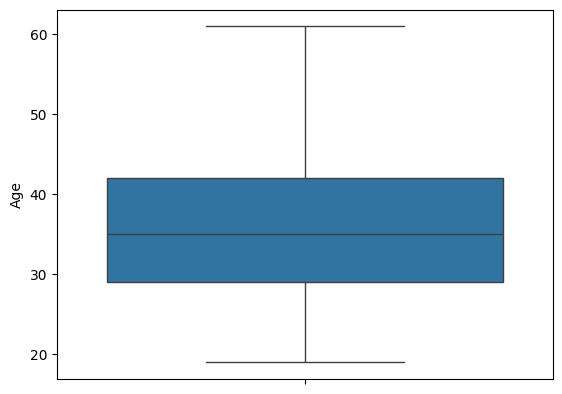

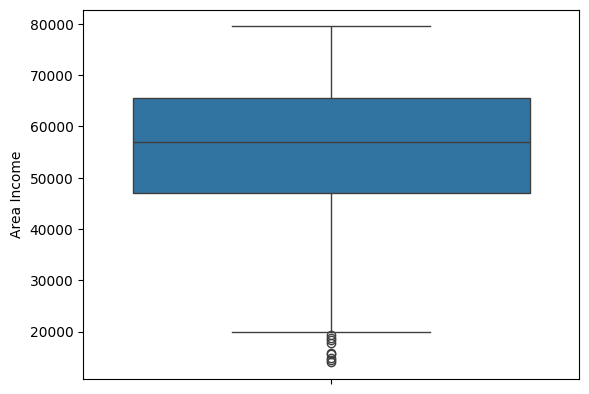

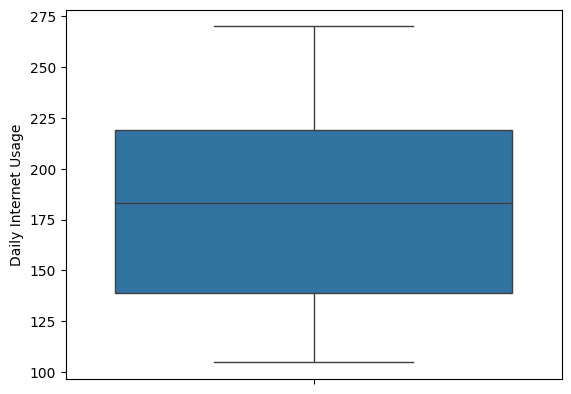

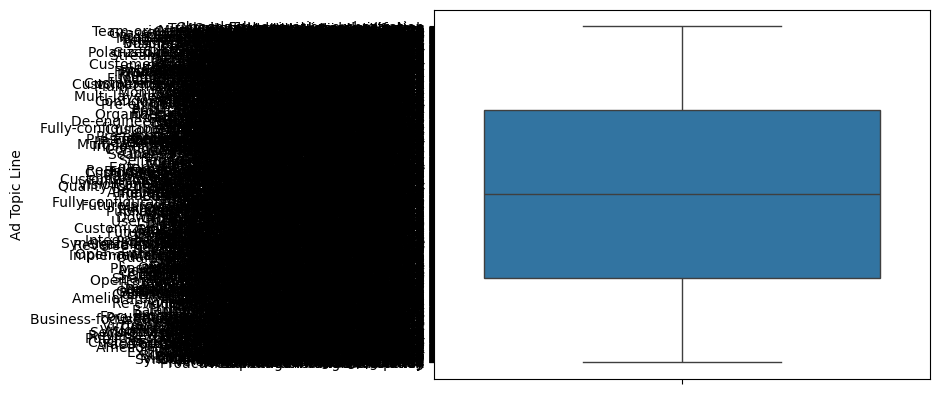

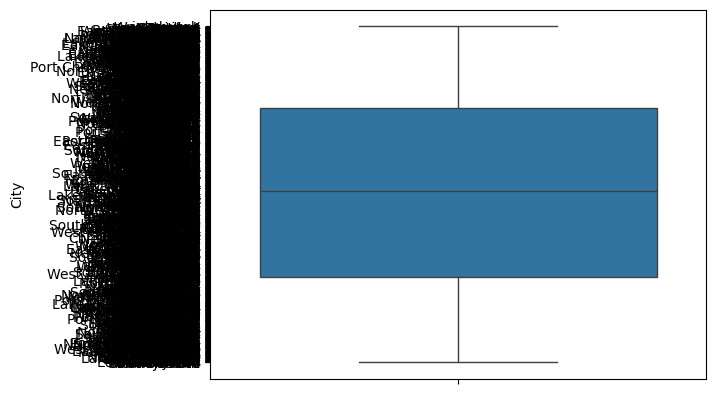

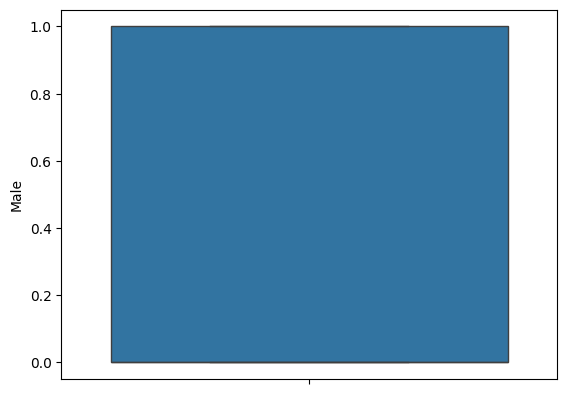

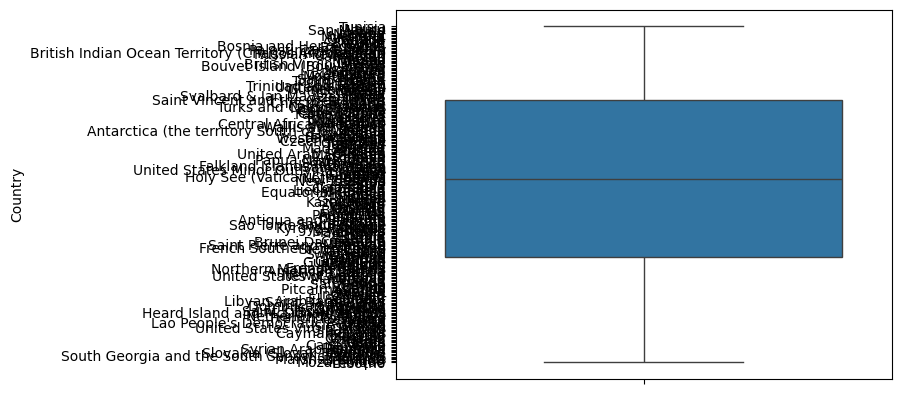

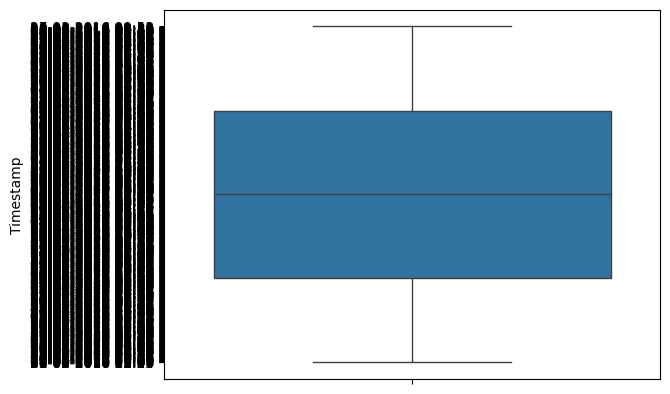

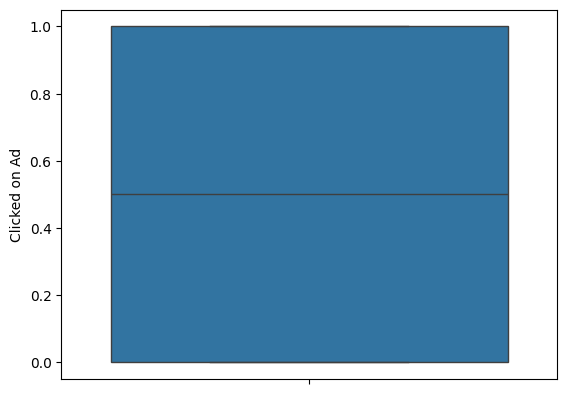

In [13]:
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [14]:
def outlier_capping(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3-Q1
    lower_extreme = Q1-1.5*IQR
    upper_extreme = Q3+1.5*IQR
    df[column] = df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

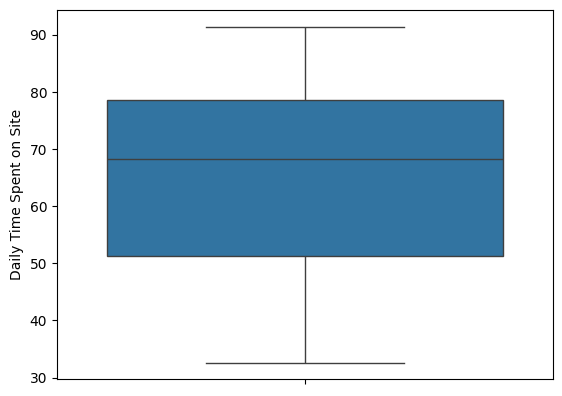

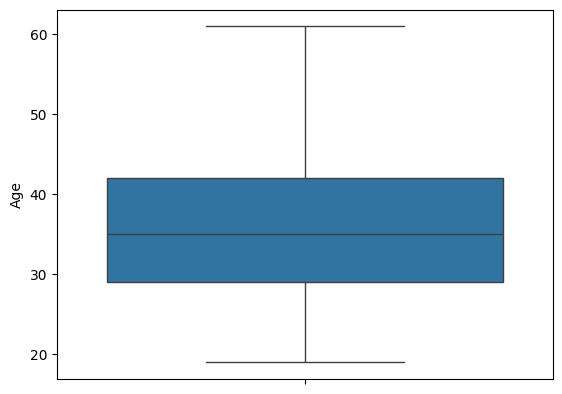

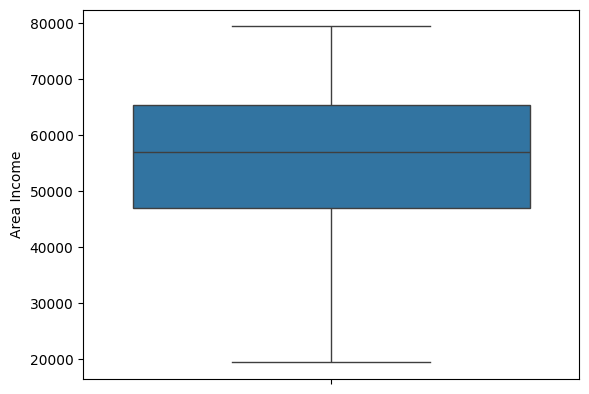

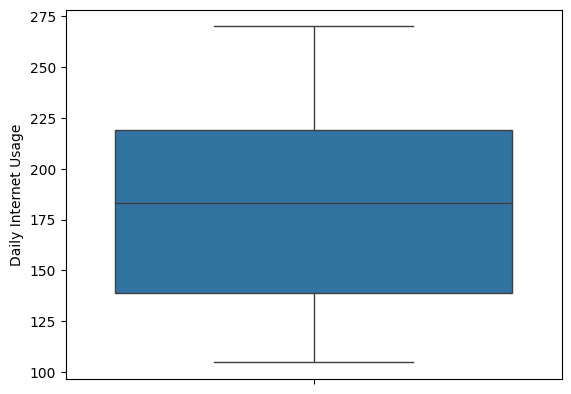

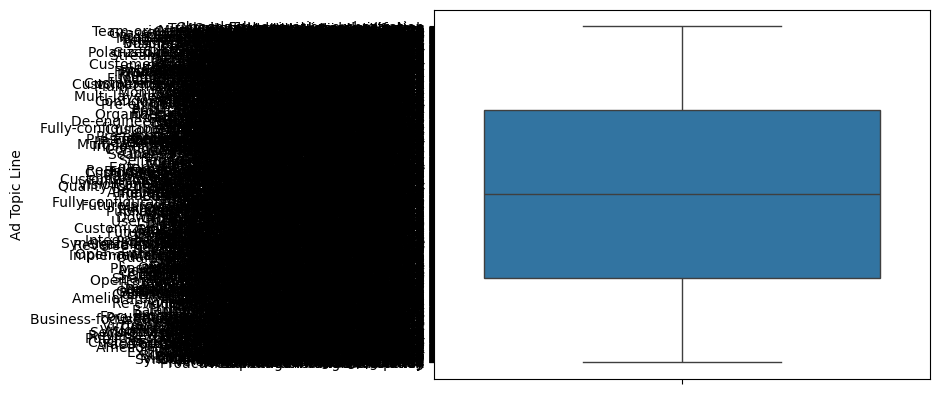

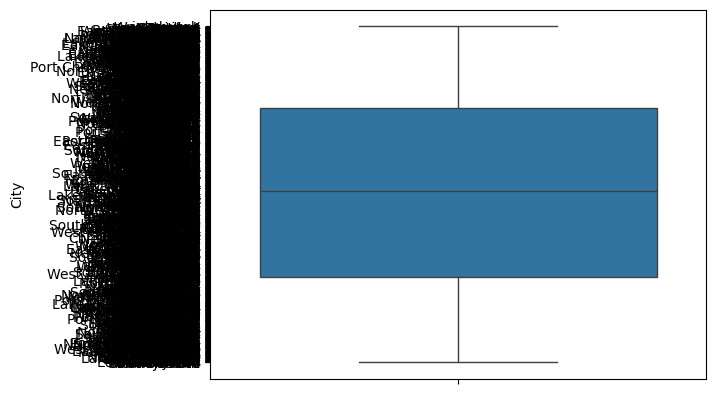

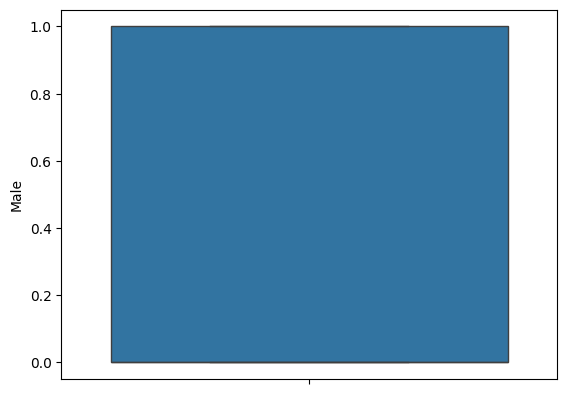

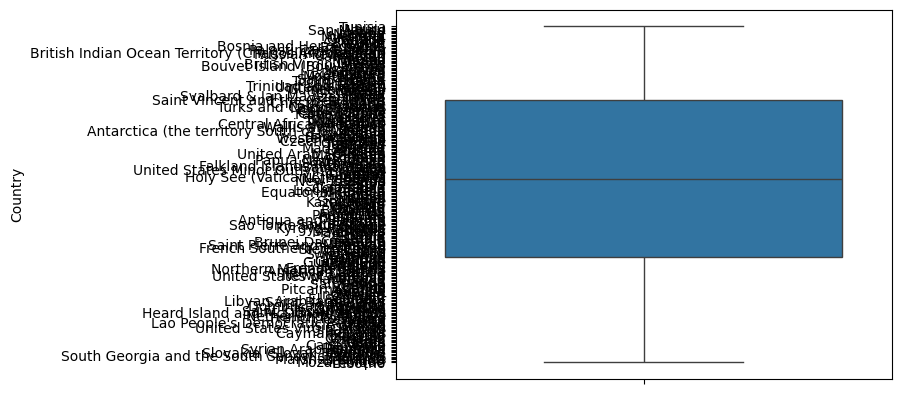

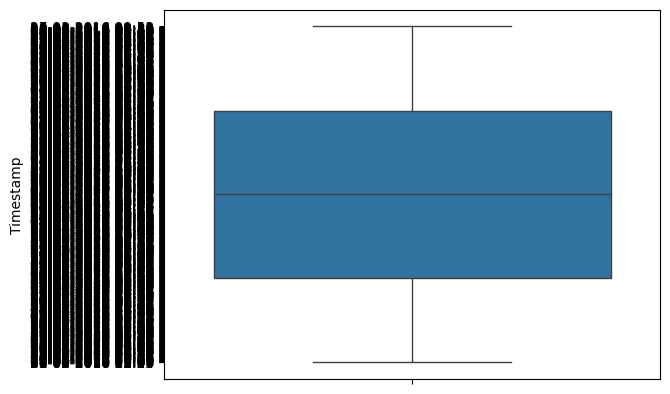

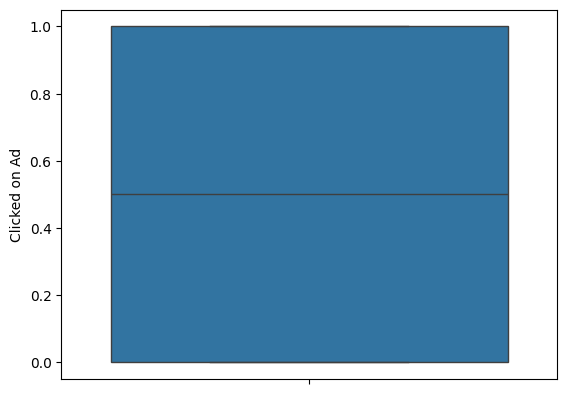

In [15]:
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [16]:
df['hour_of_day'] = pd.to_datetime(df['Timestamp']).dt.hour
df.head()

C:\Users\Kaveeshvar\AppData\Local\Temp\ipykernel_23884\3101587416.py:1: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour_of_day'] = pd.to_datetime(df['Timestamp']).dt.hour


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour_of_day
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0,1
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0,20
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0,2
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0,3


In [ ]:
# Create at least 1 derived column
df['Gender']= df['Male'].map({1:'male',0:'female'})
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour_of_day,Gender
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0,0,female
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0,1,male
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0,20,female
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0,2,male
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0,3,female


In [27]:
# Top 5 entities by a metric
df[df['Clicked on Ad'] == 0].sort_values(by='Daily Time Spent on Site',ascending=False)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour_of_day,Gender
533,91.43,39,46964.11,209.91,Organic motivating model,West Carmenfurt,1,French Polynesia,07-07-2016 03:55,0,3,male
927,91.15,38,36834.04,184.98,Robust uniform framework,Joshuamouth,0,Cyprus,22-02-2016 07:04,0,7,female
637,91.10,40,55499.69,198.13,Secured intermediate approach,Michaelmouth,1,Bolivia,07-03-2016 22:51,0,22,male
321,90.97,37,54520.14,180.77,Multi-lateral empowering throughput,Kimberlytown,0,Congo,16-02-2016 18:21,0,18,female
867,90.75,40,45945.88,216.50,Decentralized methodical capability,Lake Joseph,0,Togo,11-03-2016 09:58,0,9,female
...,...,...,...,...,...,...,...,...,...,...,...,...
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0,2,female
749,54.35,42,76984.21,164.02,Proactive interactive service-desk,Lake Hailey,0,Sweden,20-06-2016 08:22,0,8,female
954,51.65,31,58996.56,249.99,Virtual context-sensitive support,Mclaughlinbury,0,Ireland,25-05-2016 10:39,0,10,female
121,49.58,26,56791.75,231.94,Self-enabling holistic process improvement,Johnsport,0,Benin,07-04-2016 16:02,0,16,female


In [34]:
df['Age'].mean()

np.float64(36.009)

In [35]:
# number of people clicked on ad and the age is above mean
df[(df['Clicked on Ad'] == 1) & (df['Age']<=df['Age'].mean())].shape[0]

177

In [ ]:
# How the columns Daily Time Spent on Site Age Area Income affect the Clicked on Ad column.
df.groupby('Clicked on Ad')[['Daily Time Spent on Site','Age','Area Income']].mean()

,Daily Time Spent on Site,Age,Area Income
Clicked on Ad,,,
0,76.85462,31.684,61385.586420
1,53.14578,40.334,48665.056307


In [38]:
df[['Daily Time Spent on Site','Age','Area Income','Clicked on Ad']].corr()

,Daily Time Spent on Site,Age,Area Income,Clicked on Ad
Daily Time Spent on Site,1.000000,-0.331513,0.312198,-0.748117
Age,-0.331513,1.000000,-0.182403,0.492531
Area Income,0.312198,-0.182403,1.000000,-0.476905
Clicked on Ad,-0.748117,0.492531,-0.476905,1.000000


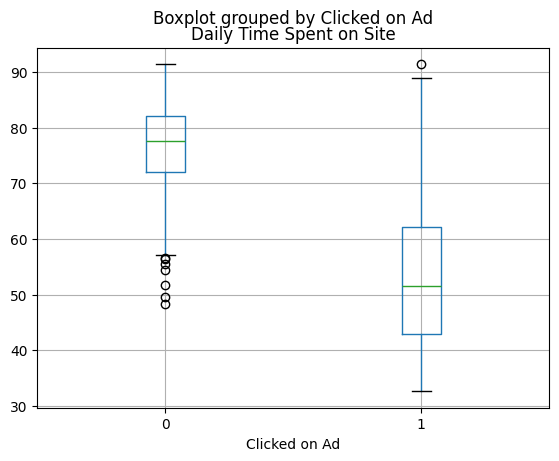

In [40]:
df.boxplot(column='Daily Time Spent on Site', by='Clicked on Ad');

In [46]:
# Which hour of day had most clicks
df[df['Clicked on Ad'] == 1]['hour_of_day'].value_counts().idxmax()

np.int32(9)

Gender
female    269
male      231
Name: Clicked on Ad, dtype: int64

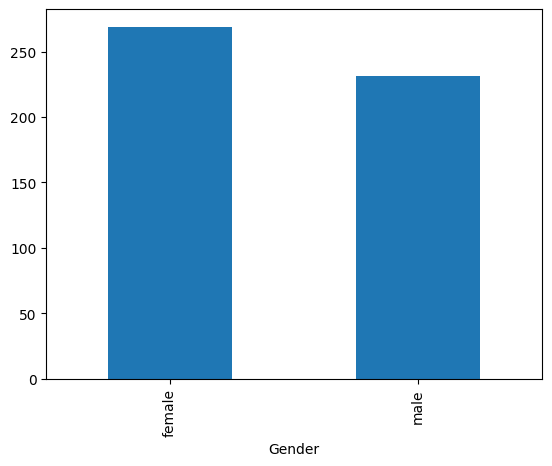

In [50]:
#  Gender vs clicks count + chart
gender_clicks = df.groupby('Gender')['Clicked on Ad'].sum()
gender_clicks.plot(kind='bar')
gender_clicks


In [53]:
# Count of countries
df['Country'].value_counts()

Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64

In [57]:
# Country with highest average Daily Time Spent on Site
df.groupby('Country')['Daily Time Spent on Site'].mean().idxmax()

'Lesotho'

In [58]:
# 1. Hour with most clicks
df['hour'] = pd.to_datetime(df['Timestamp']).dt.hour
top_click_hour = df[df['Clicked on Ad'] == 1]['hour'].value_counts().idxmax()

# 2. Gender vs clicks
gender_clicks = df.groupby('Gender')['Clicked on Ad'].sum()

# 3. Country counts
country_counts = df['Country'].value_counts()

# 4. Country with highest avg time spent
top_time_country = df.groupby('Country')['Daily Time Spent on Site'].mean().idxmax()

print("Top click hour:", top_click_hour)
print("Gender clicks:\n", gender_clicks)
print("Country counts:\n", country_counts)
print("Top avg time spent country:", top_time_country)


Top click hour: 9
Gender clicks:
 Gender
female    269
male      231
Name: Clicked on Ad, dtype: int64
Country counts:
 Country
Czech Republic      9
France              9
Senegal             8
Peru                8
Greece              8
                   ..
Kiribati            1
Marshall Islands    1
Bermuda             1
Mozambique          1
Lesotho             1
Name: count, Length: 237, dtype: int64
Top avg time spent country: Lesotho


C:\Users\Kaveeshvar\AppData\Local\Temp\ipykernel_23884\2818103797.py:2: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['hour'] = pd.to_datetime(df['Timestamp']).dt.hour


In [59]:
df.to_csv('Cleaned_advertising.csv',index=False)